# 使用说明书
此代码实现的功能如下：
+ 数据预处理：将Cal文件内数据读取并进行处理（注：需要完整记录基线、80、50，51，53，20，第二零点，若不完整需先进行补充）
+ 计算响应电阻、响应大小、区分度、响应稳定性、恢复程度、基线偏差
+ 从响应电阻、响应大小、区分度、响应稳定性、恢复程度、基线偏差对数据进行分组
+ 绘制响应电阻、响应大小、区分度 曲线图像
+ 筛选出满足6参数或是7参数的部件


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import os
import math
import seaborn as sns

In [46]:
#区间
""" response_resistance_x= [0,
2.9999,
20,
30,
40,
50,
60,
70,
80,
90,
100,
110,
120,
130,
140,
150,
160,
170,
180,
190,
200,
210,
220,
230,
240,
250,
260,
270,
280,
290,
300,
310,
320,
330,
340,
350,
360,
370,
380,
390,
400,
409600
]
response_size_x=[
0,
1,
1.99999,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
409600
]
discrimination_x=[
    0,
0.1,
0.2,
0.3,
0.4,
0.5,
0.6,
0.7,
0.8,
0.9,
1.09999,
1.1,
1.2,
1.3,
1.4,
1.5,
1.6,
1.7,
1.8,
1.9,
2,
2.1,
2.2,
2.3,
2.4,
2.5,
2.6,
2.7,
2.8,
2.9,
3,
3.1,
3.2,
3.3,
3.4,
3.5,
3.6,
3.7,
3.8,
3.9,
4,
409600,
]
response_stability_x=[
    0,
0.05,
0.1,
0.15,
0.2,
0.25,
0.3,
0.35,
0.4,
0.45,
0.5,
0.55,
0.6,
0.65,
0.7,
0.75,
0.8,
0.85,
0.94999,
0.95,
1,
1.05,
1.1,
1.15,
1.2,
1.25,
1.3,
1.35,
1.4,
1.45,
1.5,
1.55,
1.6,
1.65,
1.7,
409600,
]
restoration_x=[
    0,
0.03,
0.06,
0.09,
0.12,
0.15,
0.18,
0.21,
0.24,
0.27,
0.3,
0.33,
0.36,
0.39,
0.42,
0.45,
0.48,
0.51,
0.54,
0.57,
0.6,
0.63,
0.66,
0.69,
0.749999,
0.75,
0.78,
0.81,
0.84,
0.87,
0.9,
0.93,
0.96,
0.99,
1.02,
1.05,
1.08,
1.11,
1.14,
1.17,
1.2,
1.23,
1.26,
1.29,
1.32,
1.35,
1.38,
1.41,
1.44,
1.47,
1.5,
409600,
]
baseline_deviation_x=[
-0.6,
-0.58,
-0.56,
-0.54,
-0.52,
-0.5,
-0.48,
-0.46,
-0.44,
-0.42,
-0.4,
-0.38,
-0.36,
-0.34,
-0.32,
-0.3,
-0.28,
-0.26,
-0.24,
-0.22,
-0.20001,
-0.18,
-0.16,
-0.14,
-0.12,
-0.1,
-0.08,
-0.06,
-0.04,
-0.02,
0,
0.02,
0.04,
0.06,
0.08,
0.1,
0.12,
0.14,
0.16,
0.18,
0.2,
0.22,
0.24,
0.26,
0.28,
0.3,
409600,
]
high_discrimination_x=[
0,
0.1,
0.2,
0.3,
0.4,
0.5,
0.6,
0.7,
0.8,
0.9,
1,
1.1,
1.29999,
1.3,
1.4,
1.5,
1.6,
1.7,
1.8,
1.9,
2,
2.1,
2.2,
2.3,
2.4,
2.5,
2.6,
2.7,
2.8,
2.9,
3,
3.1,
3.2,
3.3,
3.4,
3.5,
3.6,
3.7,
3.8,
3.9,
4,
409600,
]
pd.DataFrame(
    [response_resistance_x,response_size_x,discrimination_x,response_stability_x,restoration_x,baseline_deviation_x,high_discrimination_x]
             ).to_csv("scale_file.csv",index=False) """


' response_resistance_x= [0,\n2.9999,\n20,\n30,\n40,\n50,\n60,\n70,\n80,\n90,\n100,\n110,\n120,\n130,\n140,\n150,\n160,\n170,\n180,\n190,\n200,\n210,\n220,\n230,\n240,\n250,\n260,\n270,\n280,\n290,\n300,\n310,\n320,\n330,\n340,\n350,\n360,\n370,\n380,\n390,\n400,\n409600\n]\nresponse_size_x=[\n0,\n1,\n1.99999,\n3,\n4,\n5,\n6,\n7,\n8,\n9,\n10,\n11,\n12,\n13,\n14,\n15,\n16,\n17,\n18,\n19,\n20,\n21,\n22,\n23,\n24,\n25,\n26,\n27,\n28,\n29,\n30,\n409600\n]\ndiscrimination_x=[\n    0,\n0.1,\n0.2,\n0.3,\n0.4,\n0.5,\n0.6,\n0.7,\n0.8,\n0.9,\n1.09999,\n1.1,\n1.2,\n1.3,\n1.4,\n1.5,\n1.6,\n1.7,\n1.8,\n1.9,\n2,\n2.1,\n2.2,\n2.3,\n2.4,\n2.5,\n2.6,\n2.7,\n2.8,\n2.9,\n3,\n3.1,\n3.2,\n3.3,\n3.4,\n3.5,\n3.6,\n3.7,\n3.8,\n3.9,\n4,\n409600,\n]\nresponse_stability_x=[\n    0,\n0.05,\n0.1,\n0.15,\n0.2,\n0.25,\n0.3,\n0.35,\n0.4,\n0.45,\n0.5,\n0.55,\n0.6,\n0.65,\n0.7,\n0.75,\n0.8,\n0.85,\n0.94999,\n0.95,\n1,\n1.05,\n1.1,\n1.15,\n1.2,\n1.25,\n1.3,\n1.35,\n1.4,\n1.45,\n1.5,\n1.55,\n1.6,\n1.65,\n1.7,\n409600,\n]

In [47]:
scale = pd.read_csv("scale_file.csv")
scale.index=["response_resistance_x","response_size_x","discrimination_x","response_stability_x","restoration_x","baseline_deviation_x","high_discrimination_x"
                     ]
response_resistance_x=list(scale[scale.index=="response_resistance_x"].T["response_resistance_x"])
response_size_x=list(scale[scale.index=="response_size_x"].T["response_size_x"])
discrimination_x=list(scale[scale.index=="discrimination_x"].T["discrimination_x"])
response_stability_x=list(scale[scale.index=="response_stability_x"].T["response_stability_x"])
restoration_x=list(scale[scale.index=="restoration_x"].T["restoration_x"])
baseline_deviation_x=list(scale[scale.index=="baseline_deviation_x"].T["baseline_deviation_x"])
high_discrimination_x=list(scale[scale.index=="high_discrimination_x"].T["high_discrimination_x"])
response_resistance_x=[x for x in response_resistance_x if not math.isnan(x)]
response_size_x=[x for x in response_size_x if not math.isnan(x)]
discrimination_x=[x for x in discrimination_x if not math.isnan(x)]
response_stability_x=[x for x in response_stability_x if not math.isnan(x)]
restoration_x=[x for x in restoration_x if not math.isnan(x)]
baseline_deviation_x=[x for x in baseline_deviation_x if not math.isnan(x)]
high_discrimination_x=[x for x in high_discrimination_x if not math.isnan(x)]

In [48]:
def get_filepaths(dir):
    filepaths = []
    for filename in os.listdir(dir):
        filepath = os.path.join(dir, filename)
        if os.path.isfile(filepath):
            filepaths.append(filepath)
    return filepaths
 
filepaths = get_filepaths("data")
for i,j in enumerate(filepaths):
    filepaths[i]=j[5:]


数据处理

In [49]:
path_="05-31 15-12-30 Cal.txt"#引号内填入文件名
data = pd.read_csv(path_,sep=r'\s+',names=[str(i) for i in range(2500)])
data=data.transpose().dropna(how="all",axis=0)
data = data[data.sum(axis=1) != 0][1:]

计算指标

In [50]:
if data.columns.__len__()==8:
    response_resistance = data[4]
    response_size = data[0]/data[4]
    discrimination = data[4]/data[3]
    response_stability=data[5]/data[4]
    restoration=data[6]/data[0]
    baseline_deviation=(data[0]-data[7])/data[0]
    high_discrimination=data[2]/data[1]
    
if data.columns.__len__()==7:
    response_resistance = data[2]
    response_size = data[0]/data[2]
    discrimination = data[2]/data[1]
    response_stability = data[3]/data[2]
    restoration = data[4]/data[0]
    baseline_deviation=(data[0]-data[6])/data[0]

绘图

In [51]:
""" y_1=[0]+list(pd.cut(response_resistance,bins=response_resistance_x).value_counts(sort=False,normalize=True)[:-1].values)
y_2=[0]+list(pd.cut(response_size,bins=response_size_x).value_counts(sort=False,normalize=True)[:-1].values)
y_3=[0]+list(pd.cut(discrimination,bins=discrimination_x).value_counts(sort=False,normalize=True)[:-1].values)
x_1=[str(i) for i in response_resistance_x[:-1]]
x_2=[str(i) for i in response_size_x[:-1]]
x_3=[str(i) for i in discrimination_x[:-1]] """

' y_1=[0]+list(pd.cut(response_resistance,bins=response_resistance_x).value_counts(sort=False,normalize=True)[:-1].values)\ny_2=[0]+list(pd.cut(response_size,bins=response_size_x).value_counts(sort=False,normalize=True)[:-1].values)\ny_3=[0]+list(pd.cut(discrimination,bins=discrimination_x).value_counts(sort=False,normalize=True)[:-1].values)\nx_1=[str(i) for i in response_resistance_x[:-1]]\nx_2=[str(i) for i in response_size_x[:-1]]\nx_3=[str(i) for i in discrimination_x[:-1]] '

In [52]:
y_1=[0]+list(pd.cut(response_resistance,bins=response_resistance_x).value_counts(sort=False,normalize=True)[:11].values)
y_2=[0]+list(pd.cut(response_size,bins=response_size_x).value_counts(sort=False,normalize=True)[:16].values)
y_3=[0]+list(pd.cut(discrimination,bins=discrimination_x).value_counts(sort=False,normalize=True)[5:25].values)
y_4=[0]+list(pd.cut(response_stability,bins=response_stability_x).value_counts(sort=False,normalize=True)[10:30].values)
y_5=[0]+list(pd.cut(restoration,bins=restoration_x).value_counts(sort=False,normalize=True)[17:-1].values)
y_6=[0]+list(pd.cut(baseline_deviation,bins=baseline_deviation_x).value_counts(sort=False,normalize=True)[15:-1].values)

x_1=response_resistance_x[:12]
x_2=response_size_x[:17]
x_3=discrimination_x[5:26]
x_4=response_stability_x[10:31]
x_5=restoration_x[17:-1]
x_6=baseline_deviation_x[15:-1]
if data.columns.__len__()==8:
    x_7=high_discrimination_x[5:27]
    y_7=[0]+list(pd.cut(high_discrimination,bins=high_discrimination_x).value_counts(sort=False,normalize=True)[5:26].values)


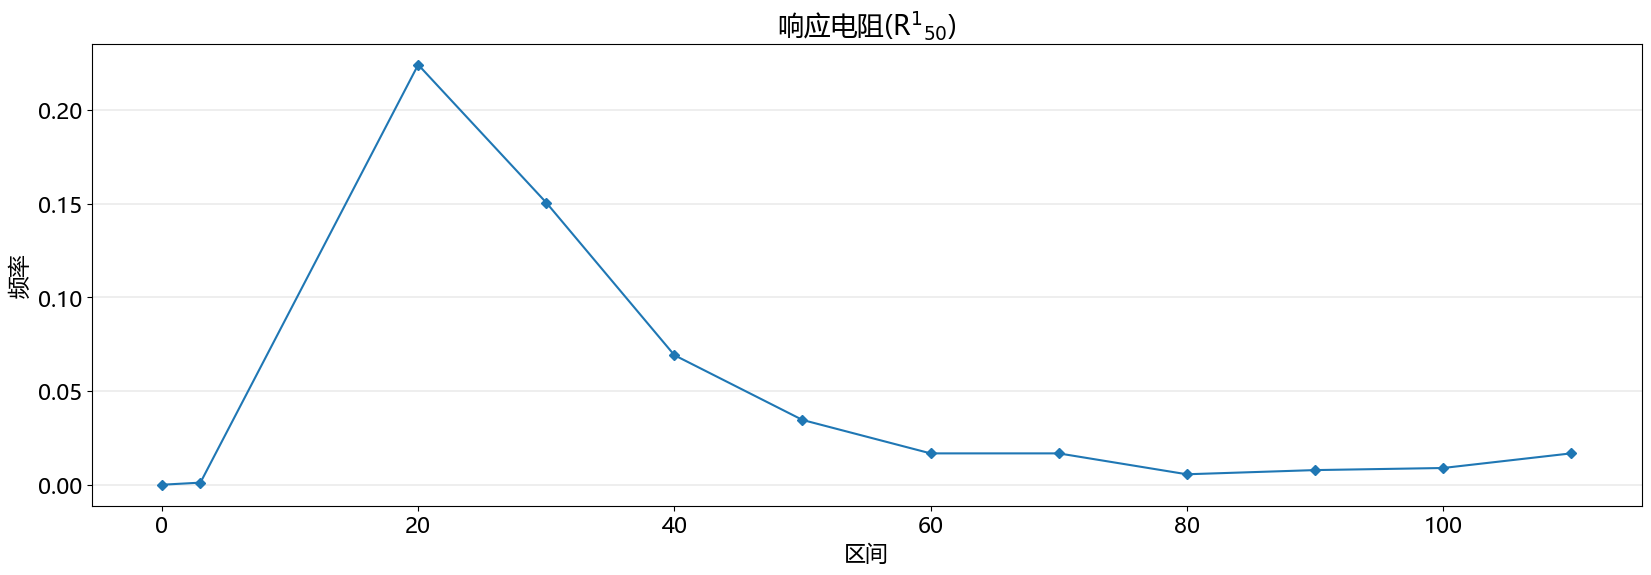

409600: 287


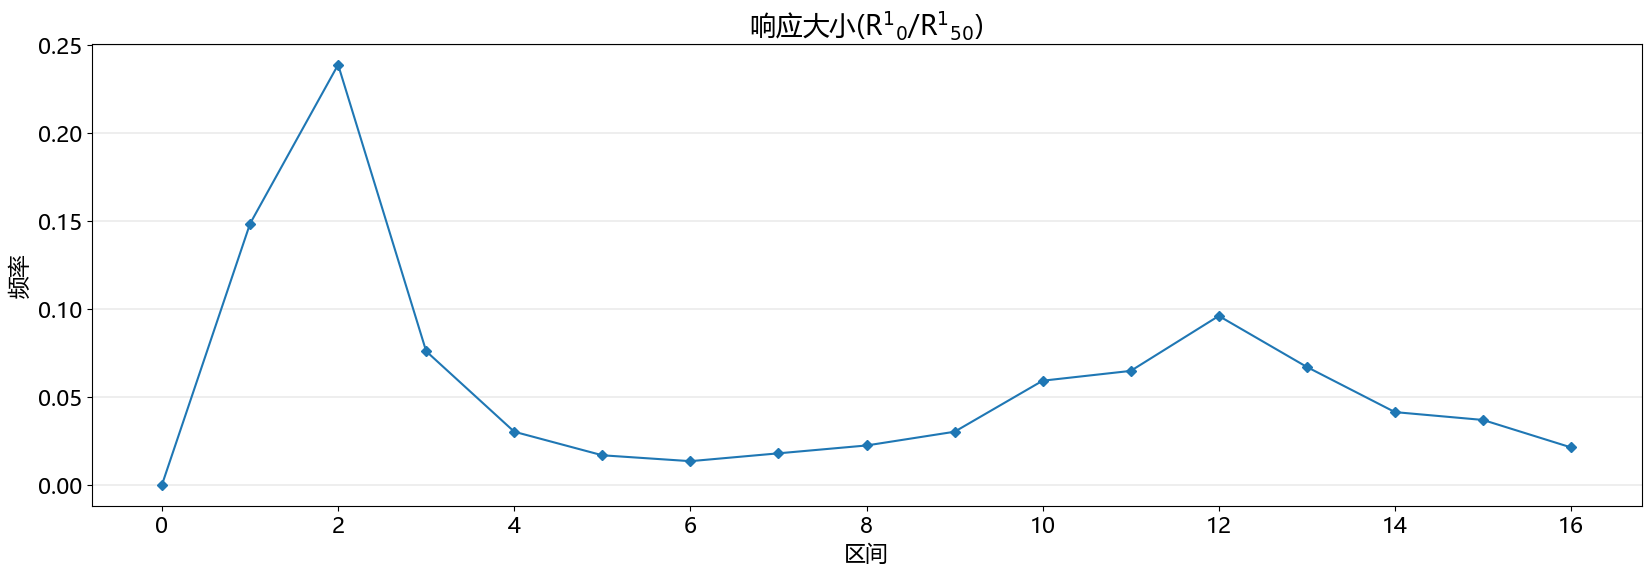

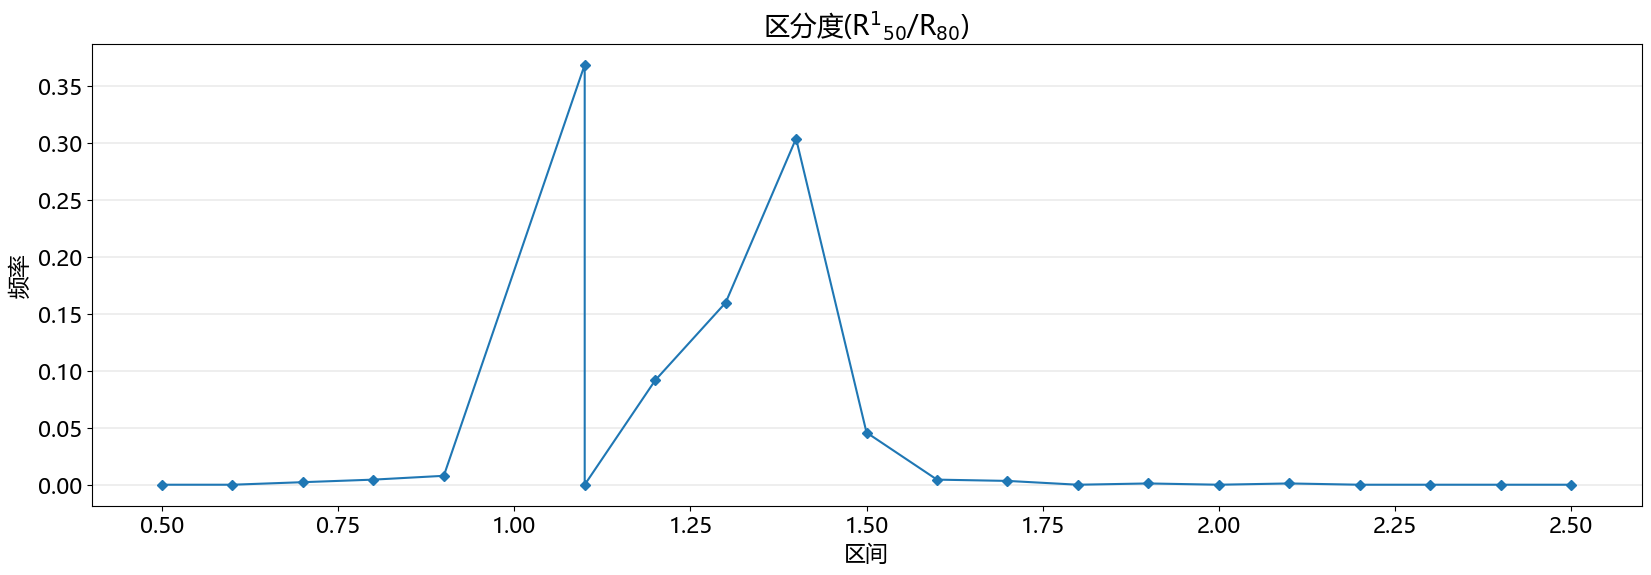

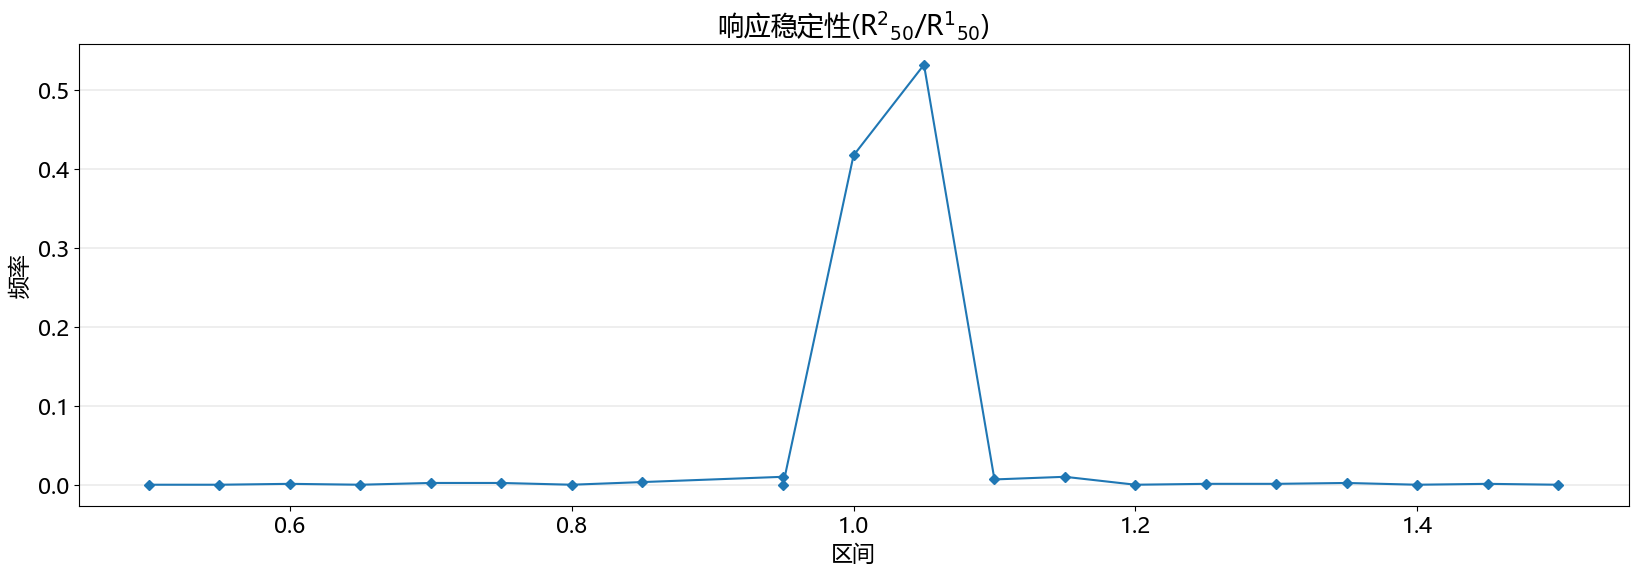

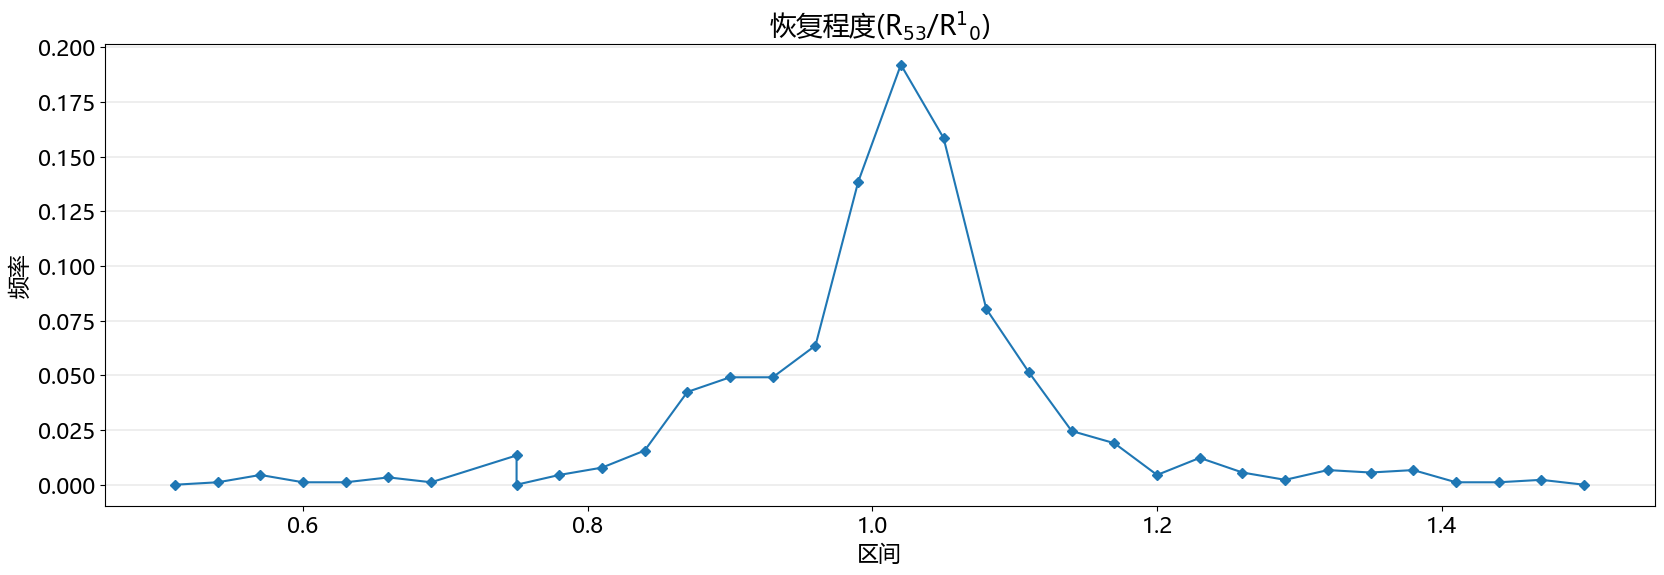

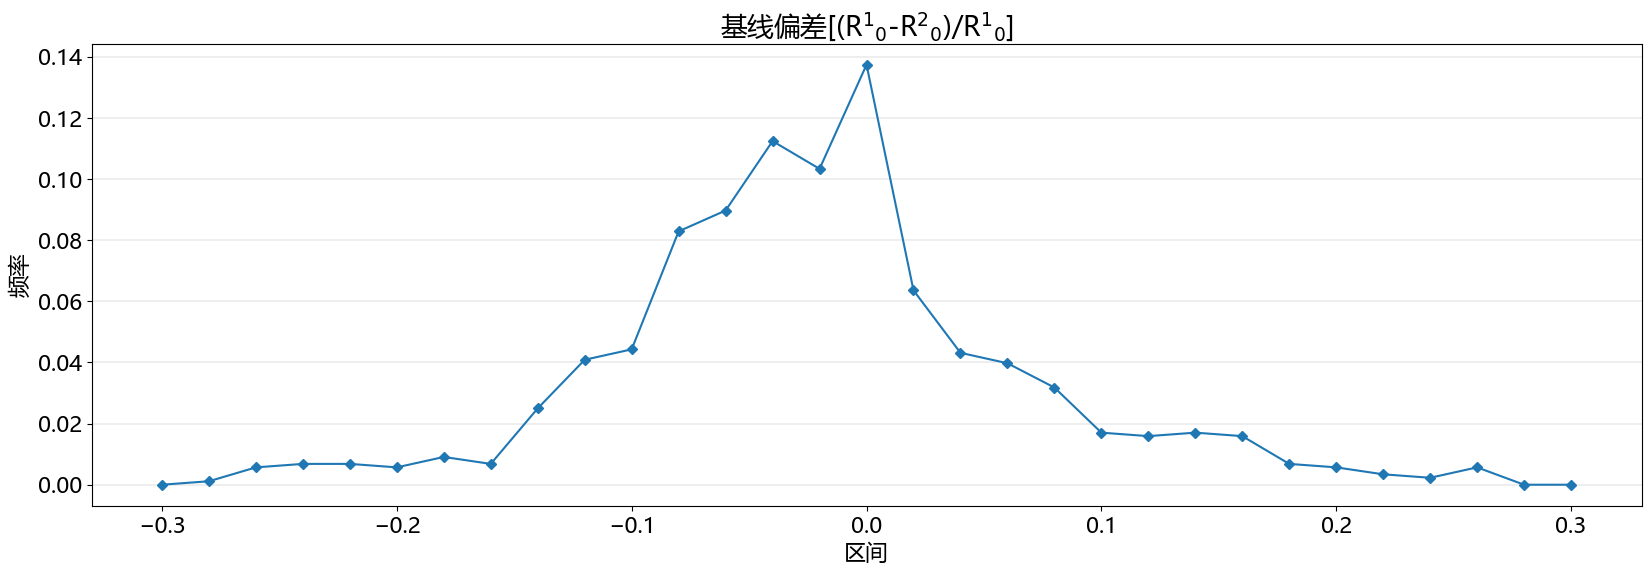

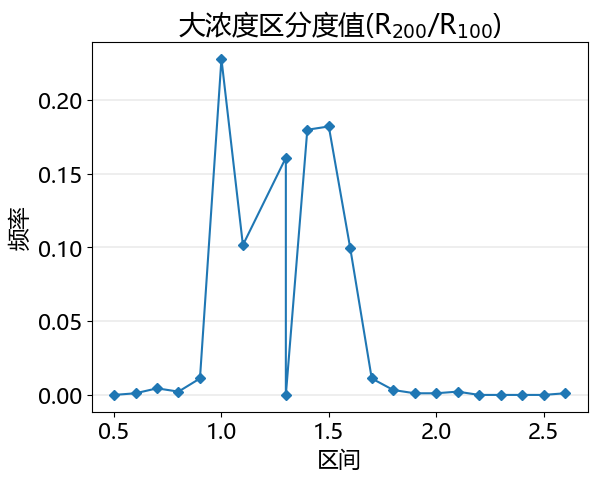

In [53]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams["font.size"] =16
plt.figure(figsize=(20, 6))
plt.title("响应电阻(R$^{1}$$_{50}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_1, y_1 ,marker='D', markersize=5)
plt.savefig('响应电阻.png')
plt.show()

print("409600:",pd.cut(response_resistance,bins=response_resistance_x).value_counts(sort=False).values[-1])

plt.figure(figsize=(20, 6))
plt.title("响应大小(R$^{1}$$_{0}$/R$^{1}$$_{50}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_2, y_2, marker='D', markersize=5)
plt.savefig('响应大小.png')
plt.show()

plt.figure(figsize=(20, 6))
plt.title("区分度(R$^{1}$$_{50}$/R$_{80}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_3, y_3, marker='D', markersize=5)
plt.savefig('区分度.png')
plt.show()

plt.figure(figsize=(20, 6))
plt.title("响应稳定性(R$^{2}$$_{50}$/R$^{1}$$_{50}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_4, y_4, marker='D', markersize=5)
plt.savefig('响应稳定性.png')
plt.show()

plt.figure(figsize=(20, 6))
plt.title("恢复程度(R$_{53}$/R$^{1}$$_{0}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_5, y_5, marker='D', markersize=5)
plt.savefig('恢复程度.png')
plt.show()

plt.figure(figsize=(20, 6))
plt.title("基线偏差[(R$^{1}$$_{0}$-R$^{2}$$_{0}$)/R$^{1}$$_{0}$]")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_6, y_6, marker='D', markersize=5)
plt.savefig('基线偏差.png')
plt.show()

if data.columns.__len__()==8:
    plt.title("大浓度区分度值(R$_{200}$/R$_{100}$)")
    plt.xlabel("区间")
    plt.ylabel("频率")
    plt.grid( axis='y', linewidth=0.3)
    plt.plot(x_7, y_7, marker='D', markersize=5)
    plt.savefig('大浓度区分度值.png')
    plt.show()


In [54]:
trace0 = go.Scatter(
    x=x_2,  
    y=y_2,  
    mode="markers + lines",  
    name="响应电阻" ,
)

fig = go.Figure(data=[trace0])
fig

存储

In [55]:
f = pd.read_excel("中(0~100).xlsx")
no_=f.columns.values[1:]
if data.columns.__len__()==7:
    data_processed = pd.concat(
        [pd.Series(no_,index=response_resistance.index),
        response_resistance,response_size,discrimination,response_stability,restoration,baseline_deviation
        ],axis=1)
    columns=["序号","响应电阻",
    "响应大小",
    "区分度",
    "响应稳定性",
    "恢复程度",
    "基线偏差",
    ]
if data.columns.__len__()==8:
    data_processed = pd.concat(
        [pd.Series(no_,index=response_resistance.index),
        response_resistance,response_size,discrimination,response_stability,restoration,baseline_deviation,high_discrimination
        ],axis=1)
    columns=["序号","响应电阻",
    "响应大小",
    "区分度",
    "响应稳定性",
    "恢复程度",
    "基线偏差",
    "大浓度区分度"
    ]
data_processed.columns=columns
data_processed.T.to_excel("中(0~100)_processed.xlsx")



In [56]:
data_processed

,序号,响应电阻,响应大小,区分度,响应稳定性,恢复程度,基线偏差,大浓度区分度
65,1+1,2022.2800,0.924318,1.021772,1.005464,1.093766,-0.093766,1.016011
66,1+2,51.0882,0.784567,0.996736,1.006559,1.443088,-0.402536,1.211399
67,1+3,67.2519,6.822097,1.357429,1.001017,1.075903,-0.106617,1.518518
68,1+4,17.7350,13.062306,1.345559,1.009552,1.050401,-0.097837,1.434054
69,1+5,1031.4900,1.497814,0.990912,1.006098,0.951048,0.041107,0.988017
...,...,...,...,...,...,...,...,...
1020,15+60,237.1190,1.003521,1.012918,0.995336,0.996491,-0.001172,0.980353
1021,15+61,19.0698,11.695351,1.371504,1.003629,1.033902,-0.076990,1.495891
1022,15+62,6013.4300,2.180602,1.015177,1.015404,1.000000,-0.107962,1.014744
1023,15+63,90.3346,0.996090,1.009842,1.000000,1.007864,-0.010828,0.985417


筛件

In [57]:
step_1=pd.merge(
    data_processed[data_processed["响应电阻"]>=3] , data_processed[data_processed["响应电阻"]<=30],how="inner"
    )
step_1.index=list(set(data_processed[data_processed["响应电阻"]>=3].index).intersection(set(data_processed[data_processed["响应电阻"]<=30].index)))

step_2=pd.merge(
    step_1[step_1["响应大小"]>=2] , step_1[step_1["响应大小"]<=15],how="inner"
    )
step_2.index=list(set(step_1[step_1["响应大小"]>=2].index).intersection(set(step_1[step_1["响应大小"]<=15].index)))

step_3=pd.merge(
    step_2[step_2["区分度"]>=1.1] , step_2[step_2["区分度"]<=1.5],how="inner"
    )
step_3.index=list(set(step_2[step_2["区分度"]>=1.1].index).intersection(set(step_2[step_2["区分度"]<=1.5].index)))

step_4=pd.merge(
    step_3[step_3["响应稳定性"]>=0.95] , step_3[step_3["响应稳定性"]<=1.05],how="inner"
    )
step_4.index=list(set(step_3[step_3["响应稳定性"]>=0.95].index).intersection(set(step_3[step_3["响应稳定性"]<=1.05].index)))

step_5=step_4[step_4["恢复程度"]>0.75]

step_6=pd.merge(
    step_5[step_5["基线偏差"]>=-0.2] , step_5[step_5["基线偏差"]<=0.1],how="inner"
    )
step_6.index=list(set(step_5[step_5["基线偏差"]<=0.1].index).intersection(set(step_5[step_5["基线偏差"]>=-0.2].index)))
step_6.index = [int(i) for i in step_6.index]
step_6.sort_index(inplace=True)
if data.columns.__len__()==8:
    step_7=step_6[step_6["大浓度区分度"]>1.3]

In [58]:
filtered_no=[]
for i in step_6.index:
    if int(i)//64<8:
        filtered_no.append(str(int(i)//64)+"+"+str(int(i) % 64))
    else:
        filtered_no.append(str(int(i)//64-1)+"+"+str(int(i) % 64))
step_6["序号"]=filtered_no

filtered_no=[]
if data.columns.__len__()==8:
    for i in step_7.index:
        if int(i)//64<8:
            filtered_no.append(str(int(i)//64)+"+"+str(int(i) % 64))
        else:
            filtered_no.append(str(int(i)//64-1)+"+"+str(int(i) % 64))
    step_7["序号"]=filtered_no

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8884\1464261758.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



生成报告

In [59]:
from docx import Document 
from docx.oxml.ns import qn
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.shared import Inches
from docx.shared import Cm
from docx.shared import Pt

document =Document()
document.styles['Normal'].font.name='楷体'
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), '楷体')
run=document.add_heading('',level=0).add_run('分析报告')
run.font.name='微软雅黑'
_title = document.styles['Title']
_title.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
paragraph = document.add_paragraph('本次测试日期为'+path_[:path_.find("C")]) 
paragraph.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
paragraph = document.add_paragraph('一共测试'+str(data.__len__())+"个器件")
paragraph = document.add_paragraph('其中符合6参数器件'+str(step_6.__len__())+"个器件"+"，良品率(占测试总数量)为"+str(round(step_6.__len__()/data.__len__(),4)*100)+"%")
paragraph = document.add_paragraph('其中符合6参数器件:'+str(list(step_6["序号"])))

if data.columns.__len__()==8:
    paragraph = document.add_paragraph('其中符合7参数器件'+str(step_7.__len__())+"个器件"+"，良品率(占测试总数量)为"+str(round(step_7.__len__()/data.__len__(),5)*100)+"%")
    paragraph = document.add_paragraph('其中符合7参数器件:'+str(list(step_7["序号"])))
document.add_picture('响应电阻.png', width=Cm(15))
document.add_picture('响应大小.png', width=Cm(15))
document.add_picture('区分度.png', width=Cm(15))
document.add_picture('恢复程度.png', width=Cm(15))
document.add_picture('基线偏差.png', width=Cm(15))

if data.columns.__len__()==8:
    document.add_picture('大浓度区分度值.png', width=Cm(15))

document.save(r'分析报告.docx')
